# Assignment 3 - Probability and Statistics, Ethics and privacy

This assignment is worth 20% of your final grade.

It is due at **6pm on Friday 15 May**, and should be submitted as a single Jupyter Notebook, through the usual online ECS submission system (https://apps.ecs.vuw.ac.nz/submit/DATA201) .

The assignment makes use of the `scipy.stats` package and the `statsmodels.formula.api` package.  It draws on material from Weeks 4 and 5, lectured by Richard Arnold.  

## Probability Distributions from data

(12 Marks)

Read the `EuropeanBirds.csv` data set of characteristics of 500 species of European Birds, which you can download from the course website.

Note: you will need to specify `encoding='latin1'` when you read the file in.

You will also need to consult the accompany information file `EuropeanBirds-Information.txt` in order to interpret the content of the data set.

Sourced from: Storchová, Lenka; Hořák, David (2018), Data from: Life-history characteristics of European birds, Dryad, Dataset, https://datadryad.org/stash/dataset/doi:10.5061/dryad.n6k3n

In [1]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

euro_birds = pd.read_csv('EuropeanBirds.csv', encoding='latin1')

1. Calculate the probabilities of the various types of nest building.  What is the probability that a male is involved in nest building?

In [2]:
table_nb = euro_birds["Nest.building"].value_counts()
prob_nb = pd.DataFrame({'counts':table_nb, 'probs':table_nb/sum(table_nb)})
print("The probability of a Male being involved in nest building is {0:1.4f}({1:3.2f}%)".format(prob_nb['probs']['M'], prob_nb['probs']['M']*100))

The probability of a Male being involved in nest building is 0.0544(5.44%)


2. How many bird species have a solely monogamous mating system?

In [3]:
table_ms = euro_birds["Mating.system"].value_counts()
print("{0:3d} bird species have a solely monogamous mating system".format(table_ms['M']))

435 bird species have a solely monogamous mating system


3. After monogamy only, what is the next most common mating system?

In [4]:
dict_ms = {'M': 'monogamous', 'M,PA': 'monogamous & polyandrous', 
           'M,PG': 'monogamous & polygynous', 
           'M,PG,PA': 'monogamous, polygynous & polyandrous', 
           'M,PG,PM': 'monogamous, polygynous & promiscuous', 
           'M,PM': 'monogamous & promiscuous', 'PG': 'polygynous', 
           'PG,PA': 'polygynous & polyandrous', 
           'PG,PM': 'polygynous & promiscuous', 'PM': 'promiscuous'}

table_ms_sorted = table_ms.sort_values(ascending=False)
print("After monogamy only, the next most common mating system is a {ms} mating system".format(ms = dict_ms[table_ms_sorted.index.values[1]]))

After monogamy only, the next most common mating system is a monogamous & polygynous mating system


4. What is the probability that a species is Sedentary (lives in the same area in both the breeding and non-breeding season)?

In [5]:
table_sed = euro_birds["Sedentary"].value_counts()
prob_sedent = pd.DataFrame({'counts':table_sed, 'probs':table_sed/sum(table_sed)})
print("A species has a {0:1.4f}({1:3.2f}%) chance of being sedentary".format(prob_sedent['probs'][1.0], prob_sedent['probs'][1.0]*100))

A species has a 0.3727(37.27%) chance of being sedentary


5. What is the probability that a species is Sedentary **and** occupies human settlements in its breeding area?

In [6]:
table_sed_hs = pd.crosstab(euro_birds['Sedentary'], euro_birds['Human.settlements'], normalize='all')
print("The probability that a species is Sedentary and occupies human settlements in its breeding area is {0:1.4f}({1:3.2f}%)".format(table_sed_hs[1.0][1.0], table_sed_hs[1.0][1.0]*100))

The probability that a species is Sedentary and occupies human settlements in its breeding area is 0.0661(6.61%)


6. What is the probability that a Sedentary species occupies human settlements in its breeding area?

In [7]:
table_hs_given_sed = pd.crosstab(euro_birds['Sedentary'], euro_birds['Human.settlements'], normalize='index')
print("The probability that a Sedentary species occupies human settlements in its breeding area is {0:1.4f}({1:3.2f}%)".format(table_hs_given_sed[1.0][1.0], table_hs_given_sed[1.0][1.0]*100))

The probability that a Sedentary species occupies human settlements in its breeding area is 0.1774(17.74%)


7. What is the probability that a species is Sedentary, given that it occupies human settlements in its breeding area?

In [8]:
table_sed_given_hs = pd.crosstab(euro_birds['Sedentary'], euro_birds['Human.settlements'], normalize='columns')
print("The probability that a species is Sedentary, given that it occupies human settlements in its breeding area is {0:1.4f}({1:3.2f})%".format(table_sed_given_hs[1.0][1.0], table_sed_given_hs[1.0][1.0]*100))

The probability that a species is Sedentary, given that it occupies human settlements in its breeding area is 0.7021(70.21)%


8. A test for Coronavirus is 70% likely to detect the infection if it is present, and 99.1% likely to return a negative test if the infection is absent.   If the prevalence of the disease (the proportion of people who have the disease) is 0.1%, then what is the probability that a person who tests positive actually has the disease?

In [9]:
prob_pos = 0.7
prob_neg = 0.991
prob_disease = 0.001

prob = (prob_pos*prob_disease)/((prob_pos*prob_disease)+(1-prob_neg))
print("The probability that a person who tests positive actually has the disease is {0:1.4f}({1:3.2f}%)".format(prob, prob*100))

The probability that a person who tests positive actually has the disease is 0.0722(7.22%)


9. How would your answer above change if the probability of a false positive test was zero?

**If the probbaility of a false positive was 0:** Then the probbaility of a true positive must be 100%

In [10]:
prob_pos = 0.7
prob_neg = 0.991
prob_disease = 0.001

prob = (prob_pos*prob_disease)/((prob_pos*prob_disease)+0)
print("The probability that a person who tests positive actually has the disease (with no possibility of a false positive) is {0:1.2f}({1:3d}%)".format(prob, int(prob*100)))

The probability that a person who tests positive actually has the disease (with no possibility of a false positive) is 1.00(100%)


## Theoretical Probability Distributions

(5 Marks)

10. A Poisson random variable is often used to model counts of customer arrivals in a shop.  Assume that the number of customers to arrive in a particular hour follows a Poisson(5) distribution.  Compute and plot the probabililty distribution of a Poisson(5) distribution.  (Plot the distribution over the range 0 to 15.)

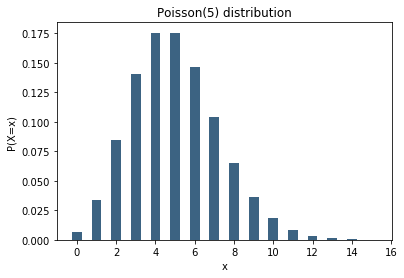

In [11]:
mu = 5
fig, ax = pl.subplots(1, 1)
x = np.arange(0, 16)
bars = ax.bar(x, stats.poisson.pmf(x, mu), 0.50, color='#3c6382')
ax.set(xlabel='x', ylabel='P(X=x) ', title='Poisson(5) distribution')
pl.show()

11. Find out

  (a) The mean and variance of the distribution
  
  (b) The probability that two customers arrive in a particular hour
  
  (c) The probability fewer than 10 arrive
  
  (d) The probability that no more than 10 arrive
  
  (e) The probability that more than 15 arrive

In [12]:
# In a poisson distribution, rate parameter == mean == variance
print("(a) The mean and variance of the distribution: {0:1.0f}".format(stats.poisson.mean(mu)))
print("(b) The probability that two customers arrive in a particular hour: P(X=2)~{0:1.4f}({1:3.2f}%)".format(stats.poisson.pmf(2, 5), stats.poisson.pmf(2, 5)*100))
print("(c) The probability fewer than 10 arrive: P(X<10)~P(X<=9)~{0:1.4f}({1:3.2f}%)".format(stats.poisson.cdf(9, 5), stats.poisson.cdf(9, 5)*100))
print("(d) The probability that no more than 10 arrive: P(X<=10)~{0:1.4f}({1:3.2f}%)".format(stats.poisson.cdf(10, 5), stats.poisson.cdf(10, 5)*100))
print("(e) The probability that more than 15 arrive: P(X>15)~1-P(X<=15)~{0:1.4f}({1:3.2f}%)".format((1-stats.poisson.cdf(15, 5)), (1-stats.poisson.cdf(15, 5))*100))

(a) The mean and variance of the distribution: 5
(b) The probability that two customers arrive in a particular hour: P(X=2)~0.0842(8.42%)
(c) The probability fewer than 10 arrive: P(X<10)~P(X<=9)~0.9682(96.82%)
(d) The probability that no more than 10 arrive: P(X<=10)~0.9863(98.63%)
(e) The probability that more than 15 arrive: P(X>15)~1-P(X<=15)~0.0001(0.01%)


## Model fitting

(9 Marks)

Use the European Birds data set from above.  before you start, ensure that you rename the column `Sexual.Dimorphism` as `SexualDimorphism` - since the '.' in its name causes a problem for the ols fitting command.  Use the `rename()` command to do this.

In [13]:
euro_birds = euro_birds.rename(columns={'Sexual.dimorphism':'SexualDimorphism'})

12. Draw a scatter plot of the log of female bill length against the log of female breeding weight.  Distinguish using a plot symbol species that are or are not sexually dimorphic (with a difference between males and females in size/colour).

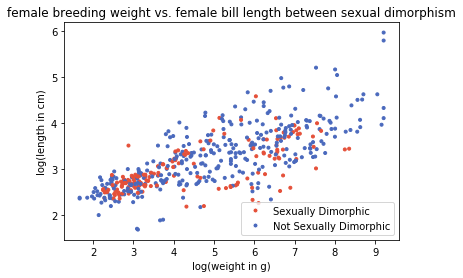

In [14]:
cols = np.where(euro_birds['SexualDimorphism']==0,'#4a69bd','#e55039')

euro_birds['logBillF'] = np.log(euro_birds['BillF_MEAN'])
euro_birds['logWeightF'] = np.log(euro_birds['WeightF_MEAN'])

x = euro_birds['logWeightF']
y = euro_birds['logBillF']

legend_elements = [Line2D([0], [0], marker='.', color='w', label='Sexually Dimorphic', markerfacecolor='#e55039', markersize=10),
                  Line2D([0], [0], marker='.', color='w', label='Not Sexually Dimorphic', markerfacecolor='#4a69bd', markersize=10)]

fig, ax = pl.subplots(1,1)
pl.scatter(x, y, marker='.', c=cols)
ax.legend(handles=legend_elements, loc='lower right')
ax.set(xlabel='log(weight in g)', ylabel='log(length in cm)',  title='female breeding weight vs. female bill length between sexual dimorphism')
pl.show()

13. Fit a regression model for log female bill length as predicted by log female breeding weight.  

  (a) Print out a summary of the model fit
  
  (b) Plot the fitted curve onto the data
  
  (c) Draw a scatter plot of the residuals and comment on them

(a) Print out a summary of the model fit
                            OLS Regression Results                            
Dep. Variable:               logBillF   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     620.5
Date:                Fri, 15 May 2020   Prob (F-statistic):           2.51e-89
Time:                        17:57:44   Log-Likelihood:                -281.26
No. Observations:                 496   AIC:                             566.5
Df Residuals:                     494   BIC:                             574.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

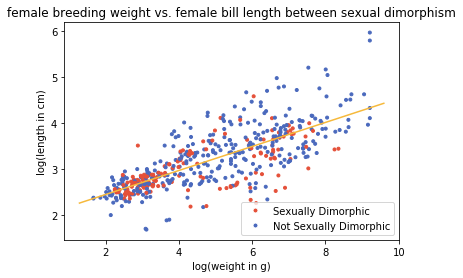

(c) Draw a scatter plot of the residuals and comment on them


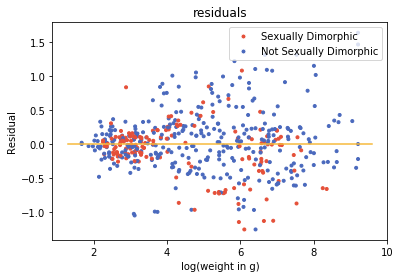

In [15]:
### 13.(a) Print out a summary of the model fit
print("(a) Print out a summary of the model fit")
fittedmodel = smf.ols(formula="logBillF ~ logWeightF", data=euro_birds).fit() 
pred = fittedmodel.predict(euro_birds)
print(fittedmodel.summary())

### 13.(b) Plot the fitted curve onto the data
print("(b) Plot the fitted curve onto the data")
# Scatter plot from Q12
fig, ax = pl.subplots(1,1)
pl.scatter(x, y, marker='.', c=cols)
ax.legend(handles=legend_elements, loc='lower right')
ax.set(xlabel='log(weight in g)', ylabel='log(length in cm)',  title='female breeding weight vs. female bill length between sexual dimorphism')

# Plotting the regression line
x_min, x_max = ax.get_xbound()
x_bounds = [x_min, x_max]
x_vals = pd.DataFrame({'logWeightF': x_bounds})
y_vals = fittedmodel.predict(x_vals)
pl.plot(x_vals, y_vals, '-', c='#f6b93b');
pl.show()

### 13.(c) Draw a scatter plot of the residuals and comment on them
print("(c) Draw a scatter plot of the residuals and comment on them")
residuals = y - pred
fig, ax = pl.subplots(1,1)
pl.scatter(x, residuals, marker='.', c=cols)
ax.set(xlabel='log(weight in g)', ylabel='Residual', title='residuals')
ax.legend(handles=legend_elements, loc='upper right')
x_min, x_max = ax.get_xbound()
x_bounds = [x_min, x_max]
y_vals = [0, 0]
pl.plot(x_bounds, y_vals, '-', c='#f6b93b')
pl.show()

**Commenting on the residuals:** There's a cluster towards the left, the rest of the data is rather sporadic and not tending towards zero which is what we want (the closer to zero the closer the prediction is to the actual), however there aren't any extreme outliers. The residuals range from -1.0 to 1,5, which isn't a huge difference. There aren't any clear patterns which is good, the fitted line seems to go through it smoothly, and no funnelling.

14. Now add Sexual Dimorphism as a covariate, and see if that improves the model by inspecting the residual scatter plot.

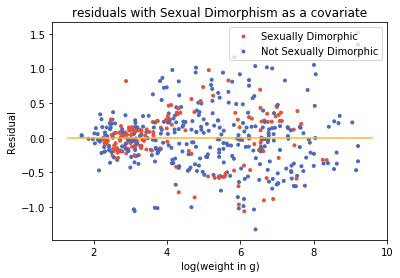

In [16]:
fittedmodel = smf.ols(formula="logBillF ~ logWeightF*C(SexualDimorphism)", data=euro_birds).fit()
pred = fittedmodel.predict(euro_birds)
residuals = euro_birds['logBillF'] - pred
fig, ax = pl.subplots(1,1)
pl.scatter(euro_birds['logWeightF'], residuals, marker='.', c=cols);
ax.set(xlabel='log(weight in g)', ylabel='Residual', title='residuals with Sexual Dimorphism as a covariate')
x_min, x_max = ax.get_xbound()
x_bounds = [x_min, x_max]
y_vals = [0, 0]
pl.plot(x_bounds, y_vals, '-', c='#f6b93b')
ax.legend(handles=legend_elements, loc='upper right')
pl.show()

**Commenting on the residuals with Sexual Dimorphism as a covariate:** There isn't any noticeable difference in the plots, furthermore outputting the residuals without Sexual Dimorphism and comparing to the residuals with Sexual Dimorphism has shown that there's only a marginal difference between the two.

## Ethical and privacy issues

(5 Marks)

15.  During the Coronavirus pandemic, many countries are investigating the electronic collection of contact data as a means of identifying close contacts of people who are diagnosed with Covid-19.   One possibility is an app on a smartphone which broadcasts an identifier which other devices record when in close proximity.  If a person is identified as a case, then the data from their app is used to identify the personal devices to which they have been close in the previous weeks.  
<br>Write a short discussion, of about 250-300 words, about the issues of **privacy**, **security** and **confidentiality** that you see with a plan of this sort.

There are privacy, security and confidentialty issues when it comes to contact tracing apps. The justification of these sort of apps rest solely on their potential to provide significant benefits, and where able, to mitigate the factors of risk to an individual's pivacy, security and confidentiality. 

Any application that utilises a device to communicate with other devices must be careful that it does not breach a person's right to privacy. Collecting data about you and who you are in close proximity on a daily basis can be a dangerous tool, especially with the potential of social network analysis and other data science tools. An application that traces a users movement is intrusive and predatory but then again it's what Google does anyway. The app must make the end-users aware of what data they're collecting, how they're collecting it and why they're collecting it. The app must be voluntary, this has a trade-off of participation vs forced invasion of privacy, in a scenario of a compulsory application: the need must be extremely justified. The scope of the application must not extend beyound that of covid-19.

It is paramount that data of this sensitivity must not be in anyway viewed by those without authorisation. This includes not just hackers but others that might be interacting with this data in some capacity. Data should be encrypted, salted and hashed, and proper E2E encryption not whatever Zoom is using. The app must have limited use such that identifiable information musn't be viewable and the app is only used for it's sole purpose.  

Confidentiality is the act of obscuring data so that it's difficult (hopefully impossible) to trace data back to the individual. An app of this sort can potentially breach confidentiality by collecting personal data such as locations, the people they're with etc.  A way to mitigate this issue is injecting noise into the data so that's it's harder to be identifiable. 